In [82]:
import pandas as pd
%matplotlib inline
import matplotlib.dates as mdates
import pandas_datareader as pdr
import datetime as dt

In [4]:
sars_death=pd.read_csv("Resources/sars_2003_complete_dataset_clean.csv")
sars_death

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0
...,...,...,...,...,...
2533,2003-07-11,Switzerland,1,0,1
2534,2003-07-11,Thailand,9,2,7
2535,2003-07-11,United Kingdom,4,0,4
2536,2003-07-11,United States,75,0,67


In [5]:
sars = sars_death[["Date", "Cumulative number of case(s)", "Number of deaths", "Number recovered"]]
sars.head()

,Date,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,1,0,0
1,2003-03-17,8,2,0
2,2003-03-17,20,0,0
3,2003-03-17,95,1,0
4,2003-03-17,2,0,0


In [6]:
grouped_by_day = sars.groupby("Date").sum()
grouped_by_day.head()

,Cumulative number of case(s),Number of deaths,Number recovered
Date,,,
2003-03-17,167,4,0
2003-03-18,219,4,0
2003-03-19,264,9,0
2003-03-20,306,10,0
2003-03-21,350,10,0


In [7]:
grouped_by_day['daily_difference'] = grouped_by_day['Cumulative number of case(s)'].diff()
grouped_by_day['daily_difference'].head()

Date
2003-03-17     NaN
2003-03-18    52.0
2003-03-19    45.0
2003-03-20    42.0
2003-03-21    44.0
Name: daily_difference, dtype: float64

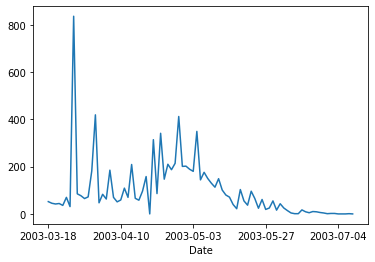

In [8]:
non_neg = grouped_by_day.loc[grouped_by_day['daily_difference'] >= 0]
non_neg['daily_difference'].plot(kind="line")

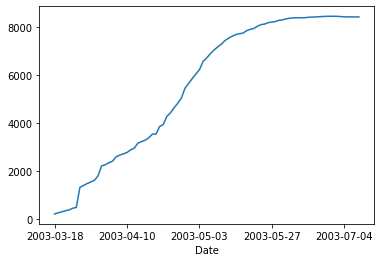

In [9]:
non_neg['Cumulative number of case(s)'].plot(kind="line")

The mean SARS daily difference is 97.62352941176471
The median SARS daily difference is 63.0
The mode SARS daily difference is 63.0


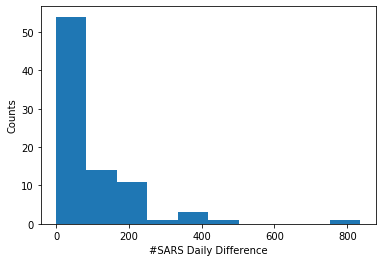

NormaltestResult(statistic=67.33031186592919, pvalue=2.3955682358432307e-15)
The population variance of SARS daily diffence is 15247.599446366783
The population standard deviation SARS daily diffence is 123.48117041220003
Roughly 68% of the data is between -25.858 and 221.105
Roughly 95% of the data is between -149.339 and 344.586
Roughly 99.7% of the data is between -272.82 and 468.067


In [10]:
#Analysis SARS daily difference 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
mean_dailydiff = np.mean(non_neg['daily_difference'])
print(f"The mean SARS daily difference is {mean_dailydiff}")
median_dailydiff = np.median(non_neg['daily_difference'])
print(f"The median SARS daily difference is {median_dailydiff}")
mode_dailydiff = sts.mode(median_dailydiff)
print(f"The mode SARS daily difference is {median_dailydiff}")

#To see distribution of SARS daily diffe
plt.hist(non_neg['daily_difference'])
plt.xlabel('#SARS Daily Difference')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(non_neg['daily_difference'].sample(50)))

#The variance and standard deviation of SARS Daily Difference
var_dailydiff = np.var(non_neg['daily_difference'],ddof = 0)
print(f"The population variance of SARS daily diffence is {var_dailydiff}")
sd_dailydiff = np.std(non_neg['daily_difference'],ddof = 0)
print(f"The population standard deviation SARS daily diffence is {sd_dailydiff}")
print(f"Roughly 68% of the data is between {round(mean_dailydiff-sd_dailydiff,3)} and {round(mean_dailydiff+sd_dailydiff,3)}")
print(f"Roughly 95% of the data is between {round(mean_dailydiff-2*sd_dailydiff,3)} and {round(mean_dailydiff+2*sd_dailydiff,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_dailydiff-3*sd_dailydiff,3)} and {round(mean_dailydiff+3*sd_dailydiff,3)}")

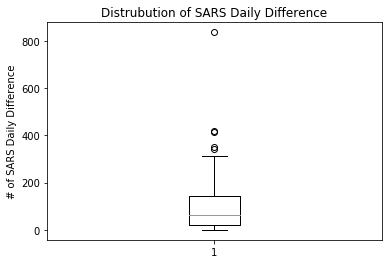

The lower quartile of SARS daily difference is: 19.0
The upper quartile of SARS daily difference is: 144.0
The interquartile range of SARS daily difference is: 125.0
The the median of SARS daily difference is: 63.0 
Values below -168.5 could be outliers.
Values above 331.5 could be outliers.


In [11]:
#Box plot to see outlier of SARS daily difference
fig1, ax1 = plt.subplots()
ax1.set_title('Distrubution of SARS Daily Difference')
ax1.set_ylabel('# of SARS Daily Difference')
ax1.boxplot(non_neg['daily_difference'])
plt.show()
quartiles = non_neg['daily_difference'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of SARS daily difference is: {lowerq}")
print(f"The upper quartile of SARS daily difference is: {upperq}")
print(f"The interquartile range of SARS daily difference is: {iqr}")
print(f"The the median of SARS daily difference is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

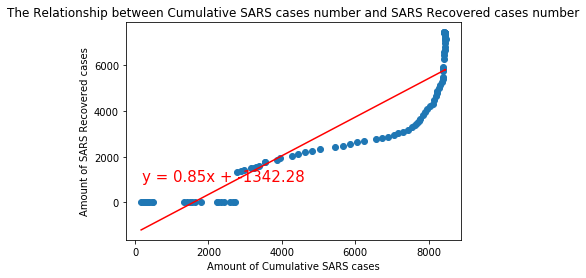

In [12]:
#Plot Cumulative SARS cases versus SARS Recovered cases on a scatterplot; Add the linear regression equation and line to plot
from scipy.stats import linregress
y_values = grouped_by_day["Number recovered"]
x_values = grouped_by_day["Cumulative number of case(s)"].astype(float)
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(200,950),fontsize=15,color="red")
plt.ylabel('Amount of SARS Recovered cases')
plt.xlabel('Amount of Cumulative SARS cases')
plt.title("The Relationship between Cumulative SARS cases number and SARS Recovered cases number")
plt.show()

Text(0.5, 0, 'Cumulative Num of Cases')

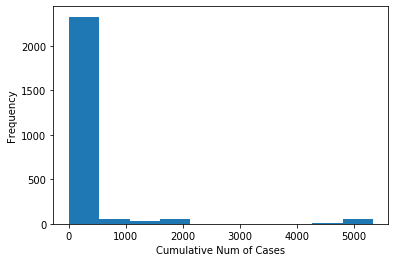

In [13]:
#Create a histogram using the cumulative number of cases
sars_death["Cumulative number of case(s)"].plot(kind='hist')
plt.xlabel('Cumulative Num of Cases')

Text(0.5, 0, 'Num of deaths')

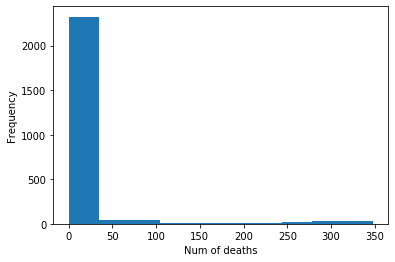

In [14]:
#Create a histogram using the number of deaths
sars_death["Number of deaths"].plot(kind='hist')
plt.xlabel('Num of deaths')

Text(0.5, 0, 'Num recovered')

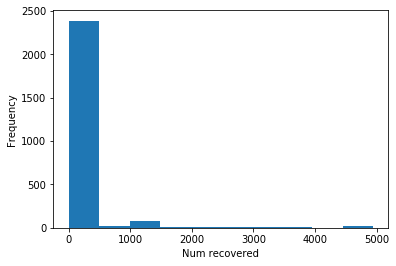

In [15]:
#Create a histogram using the number recovered 
sars_death["Number recovered"].plot(kind='hist')
plt.xlabel('Num recovered')

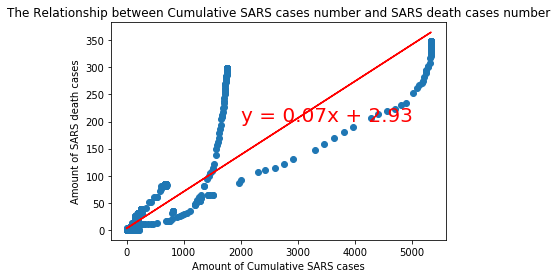

In [16]:
#Plot a linear regression for cumulative cases vs number death for the SARS 2003 complete data set  
from scipy.stats import linregress
y_values = sars_death["Number of deaths"]
x_values = sars_death["Cumulative number of case(s)"].astype(float)
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,200),fontsize=20,color="red")
plt.ylabel('Amount of SARS death cases')
plt.xlabel('Amount of Cumulative SARS cases')
plt.title("The Relationship between Cumulative SARS cases number and SARS death cases number")
plt.show()

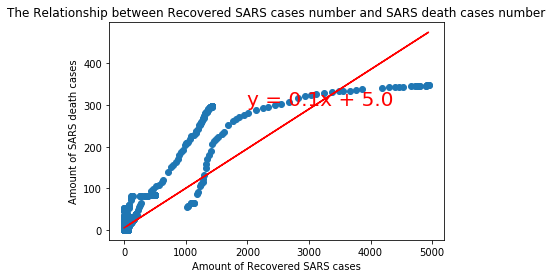

In [17]:
#Plot a linear regression for number death cases vs number recovered for the SARS 2003 complete data set
from scipy.stats import linregress
y_values = sars_death["Number of deaths"]
x_values = sars_death["Number recovered"].astype(float)
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,300),fontsize=20,color="red")
plt.ylabel('Amount of SARS death cases')
plt.xlabel('Amount of Recovered SARS cases')
plt.title("The Relationship between Recovered SARS cases number and SARS death cases number")
plt.show()

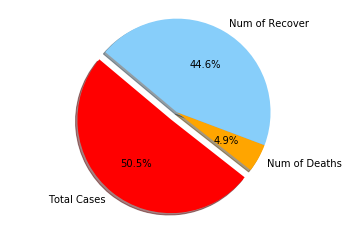

In [18]:
#Pie chart of SARS data
import matplotlib.pyplot as plt
lastday=non_neg.loc["2003-07-11"]
total_case=lastday["Cumulative number of case(s)"]
num_death=lastday["Number of deaths"]
num_recovered=lastday["Number recovered"]
labels = ["Total Cases", "Num of Deaths", "Num of Recover"]
sizes = [total_case, num_death, num_recovered]
colors = ["red", "orange", "lightskyblue"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal") 
plt.show()

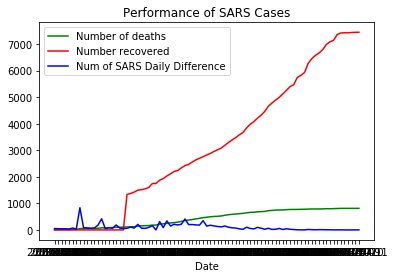

In [19]:
#Anlysis SARS Data
plt.plot(non_neg["Number of deaths"], color="green", label="Number of deaths")
plt.plot(non_neg["Number recovered"], color="red", label="Number recovered")
plt.plot(non_neg["daily_difference"], color="blue", label="Num of SARS Daily Difference")
plt.xlabel("Date")
plt.legend(loc="best")
plt.title("Performance of SARS Cases")
plt.show()

In [20]:
#Read Stock data
stock2003=pd.read_csv("Resources/2002 -nov-2003-oct.csv")
stock2003.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-11-01,885.760010,903.419983,877.710022,900.960022,900.960022,1450400000
1,2002-11-04,900.960022,924.580017,900.960022,908.349976,908.349976,1645900000
2,2002-11-05,908.349976,915.830017,904.909973,915.390015,915.390015,1354100000
3,2002-11-06,915.390015,925.659973,905.000000,923.760010,923.760010,1674000000
4,2002-11-07,923.760010,923.760010,898.679993,902.650024,902.650024,1466900000


In [21]:
final2003=pd.merge(grouped_by_day,stock2003, on="Date",how="left" )
final2003.head()

,Date,Cumulative number of case(s),Number of deaths,Number recovered,daily_difference,Open,High,Low,Close,Adj Close,Volume
0,2003-03-17,167,4,0,NaN,833.270020,862.789978,827.169983,862.789978,862.789978,1.700420e+09
1,2003-03-18,219,4,0,52.0,862.789978,866.940002,857.359985,866.450012,866.450012,1.555100e+09
2,2003-03-19,264,9,0,45.0,866.450012,874.989990,861.210022,874.020020,874.020020,1.473400e+09
3,2003-03-20,306,10,0,42.0,874.020020,879.599976,859.010010,875.669983,875.669983,1.439100e+09
4,2003-03-21,350,10,0,44.0,875.840027,895.900024,875.840027,895.789978,895.789978,1.883710e+09


In [22]:
final2003.to_csv("stock_sars_final2003.csv",index=False,header=True)

In [23]:
final2003["daily_difference"].fillna("0", inplace = True) 
final2003.head()

,Date,Cumulative number of case(s),Number of deaths,Number recovered,daily_difference,Open,High,Low,Close,Adj Close,Volume
0,2003-03-17,167,4,0,0,833.270020,862.789978,827.169983,862.789978,862.789978,1.700420e+09
1,2003-03-18,219,4,0,52,862.789978,866.940002,857.359985,866.450012,866.450012,1.555100e+09
2,2003-03-19,264,9,0,45,866.450012,874.989990,861.210022,874.020020,874.020020,1.473400e+09
3,2003-03-20,306,10,0,42,874.020020,879.599976,859.010010,875.669983,875.669983,1.439100e+09
4,2003-03-21,350,10,0,44,875.840027,895.900024,875.840027,895.789978,895.789978,1.883710e+09


In [24]:
final2003.dropna(inplace = True)

In [25]:
final2003["Daily Adj close change"]=final2003["Adj Close"].diff()
final2003["Daily Volume change"]=final2003["Volume"].diff()
final2003.round(2).head()

,Date,Cumulative number of case(s),Number of deaths,Number recovered,daily_difference,Open,High,Low,Close,Adj Close,Volume,Daily Adj close change,Daily Volume change
0,2003-03-17,167,4,0,0,833.27,862.79,827.17,862.79,862.79,1.700420e+09,NaN,NaN
1,2003-03-18,219,4,0,52,862.79,866.94,857.36,866.45,866.45,1.555100e+09,3.66,-145320000.0
2,2003-03-19,264,9,0,45,866.45,874.99,861.21,874.02,874.02,1.473400e+09,7.57,-81700000.0
3,2003-03-20,306,10,0,42,874.02,879.60,859.01,875.67,875.67,1.439100e+09,1.65,-34300000.0
4,2003-03-21,350,10,0,44,875.84,895.90,875.84,895.79,895.79,1.883710e+09,20.12,444610000.0


In [27]:
final2003.fillna("0", inplace = True)
final2003.to_csv("stock_sars_final2003.csv",index=False,header=True)

In [28]:
#Anlysis final2003
print("The shape of final2003 is "+str(final2003.shape))
final2003.dtypes

The shape of final2003 is (82, 13)


Date                             object
Cumulative number of case(s)      int64
Number of deaths                  int64
Number recovered                  int64
daily_difference                 object
Open                            float64
High                            float64
Low                             float64
Close                           float64
Adj Close                       float64
Volume                          float64
Daily Adj close change           object
Daily Volume change              object
dtype: object

The mean Daily US Stock Adj close price is 934.3973165609755
The median Daily US Stock Adj close price is 932.544983
The mode Daily US Stock Adj close price is 932.544983


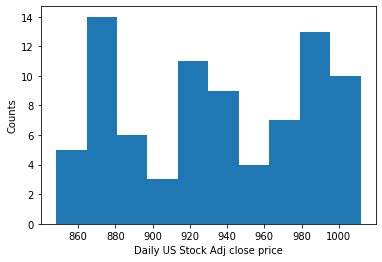

NormaltestResult(statistic=21.386190799865414, pvalue=2.2701140330094758e-05)
The population variance of Daily US Stock Adj close price is 2360.162675054572
The population standard deviation Daily US Stock Adj close price is 48.581505483615594
Roughly 68% of the data is between 885.816 and 982.979
Roughly 95% of the data is between 837.234 and 1031.56
Roughly 99.7% of the data is between 788.653 and 1080.142


In [29]:
#Analysis Daily US stock Adj close price 
mean_dailydiff = np.mean(final2003['Adj Close'])
print(f"The mean Daily US Stock Adj close price is {mean_dailydiff}")
median_dailydiff = np.median(final2003['Adj Close'])
print(f"The median Daily US Stock Adj close price is {median_dailydiff}")
mode_dailydiff = sts.mode(median_dailydiff)
print(f"The mode Daily US Stock Adj close price is {median_dailydiff}")

#To see distribution of Daily US Stock Adj close price
plt.hist(final2003['Adj Close'])
plt.xlabel('Daily US Stock Adj close price')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(final2003['Adj Close'].sample(50)))

#The variance and standard deviation of Daily US Stock Adj close price
var_dailydiff = np.var(final2003['Adj Close'],ddof = 0)
print(f"The population variance of Daily US Stock Adj close price is {var_dailydiff}")
sd_dailydiff = np.std(final2003['Adj Close'],ddof = 0)
print(f"The population standard deviation Daily US Stock Adj close price is {sd_dailydiff}")
print(f"Roughly 68% of the data is between {round(mean_dailydiff-sd_dailydiff,3)} and {round(mean_dailydiff+sd_dailydiff,3)}")
print(f"Roughly 95% of the data is between {round(mean_dailydiff-2*sd_dailydiff,3)} and {round(mean_dailydiff+2*sd_dailydiff,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_dailydiff-3*sd_dailydiff,3)} and {round(mean_dailydiff+3*sd_dailydiff,3)}")

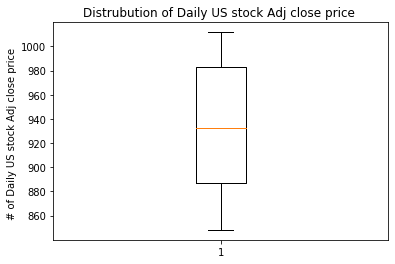

The lower quartile of Daily US stock Adj close price  is: 886.6249845000001
The upper quartile of Daily US stock Adj close price  is: 983.16751075
The interquartile range of Daily US stock Adj close price  is: 96.54252624999992
The the median of Daily US stock Adj close price  is: 932.544983 
Values below 741.8111951250003 could be outliers.
Values above 1127.981300125 could be outliers.


In [30]:
#Box plot to see outlier of Daily US stock Adj close price 
fig1, ax1 = plt.subplots()
ax1.set_title('Distrubution of Daily US stock Adj close price ')
ax1.set_ylabel('# of Daily US stock Adj close price ')
ax1.boxplot(final2003['Adj Close'])
plt.show()
quartiles = final2003['Adj Close'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Daily US stock Adj close price  is: {lowerq}")
print(f"The upper quartile of Daily US stock Adj close price  is: {upperq}")
print(f"The interquartile range of Daily US stock Adj close price  is: {iqr}")
print(f"The the median of Daily US stock Adj close price  is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

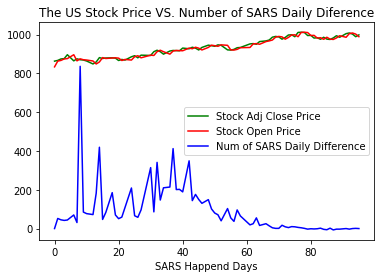

In [31]:
#Anlysis final2003
plt.plot(final2003["Adj Close"], color="green", label="Stock Adj Close Price")
plt.plot(final2003["Open"], color="red", label="Stock Open Price")
plt.plot(final2003["daily_difference"].astype(float), color="blue", label="Num of SARS Daily Difference")
plt.xlabel("SARS Happend Days")
plt.legend(loc="best")
plt.title("The US Stock Price VS. Number of SARS Daily Diference")
plt.show()

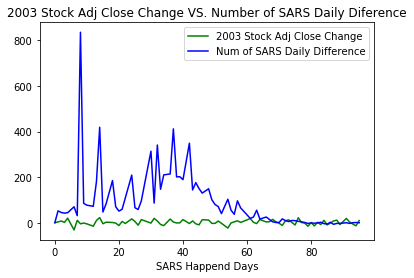

In [32]:
#Anlysis final2003
plt.plot(final2003["Daily Adj close change"].astype(float), color="green", label="2003 Stock Adj Close Change")
plt.plot(final2003["daily_difference"].astype(float), color="blue", label="Num of SARS Daily Difference")
plt.xlabel("SARS Happend Days")
plt.legend(loc="best")
plt.title("2003 Stock Adj Close Change VS. Number of SARS Daily Diference")
plt.show()

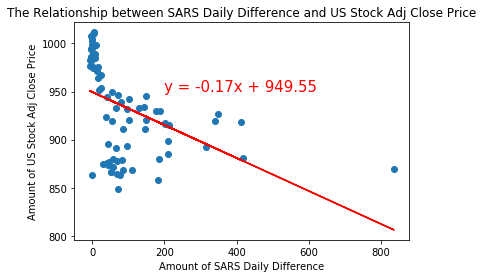

In [33]:
#Plot US Stock Adj Close Price versus SARS Daily Difference on a scatterplot;Add the linear regression equation and line to plot
from scipy.stats import linregress
y_values = final2003["Adj Close"]
x_values = final2003["daily_difference"].astype(float)
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(200,950),fontsize=15,color="red")
plt.ylabel('Amount of US Stock Adj Close Price')
plt.xlabel('Amount of SARS Daily Difference')
plt.title("The Relationship between SARS Daily Difference and US Stock Adj Close Price")
plt.show()

Text(0.5, 0, 'Cumulative Num of Cases')

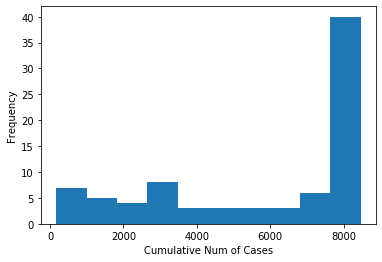

In [34]:
#Create a histogram using the cumulative number of cases 
final2003["Cumulative number of case(s)"].plot(kind='hist')
plt.xlabel('Cumulative Num of Cases')

Text(0.5, 0, 'Num of deaths')

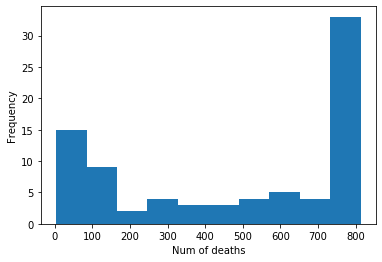

In [35]:
#Create a histogram using the number of deaths 
final2003["Number of deaths"].plot(kind='hist')
plt.xlabel('Num of deaths')

Text(0.5, 0, 'Num recovered')

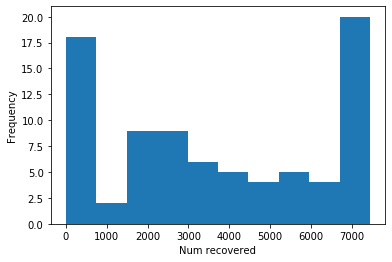

In [36]:
#Create a histogram using the number recovered 
final2003["Number recovered"].plot(kind='hist')
plt.xlabel('Num recovered')

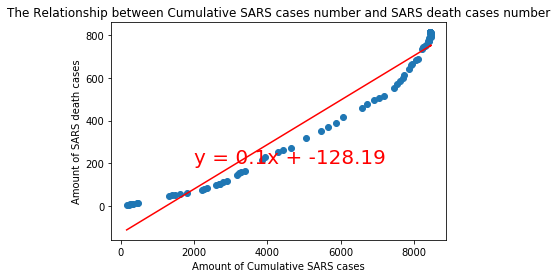

In [37]:
#Plot a linear regression for cumulative cases vs number death for the SARS final 2003 data set 
from scipy.stats import linregress
y_values = final2003["Number of deaths"]
x_values = final2003["Cumulative number of case(s)"].astype(float)
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,200),fontsize=20,color="red")
plt.ylabel('Amount of SARS death cases')
plt.xlabel('Amount of Cumulative SARS cases')
plt.title("The Relationship between Cumulative SARS cases number and SARS death cases number")
plt.show()

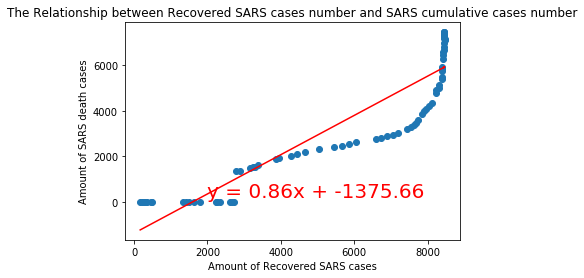

In [38]:
#Plot a linear regression for cumulative cases vs number recovered for the  SARS final 2003 data set 
from scipy.stats import linregress
y_values = final2003["Number recovered"]
x_values = final2003["Cumulative number of case(s)"].astype(float)
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,200),fontsize=20,color="red")
plt.ylabel('Amount of SARS death cases')
plt.xlabel('Amount of Recovered SARS cases')
plt.title("The Relationship between Recovered SARS cases number and SARS cumulative cases number")
plt.show()

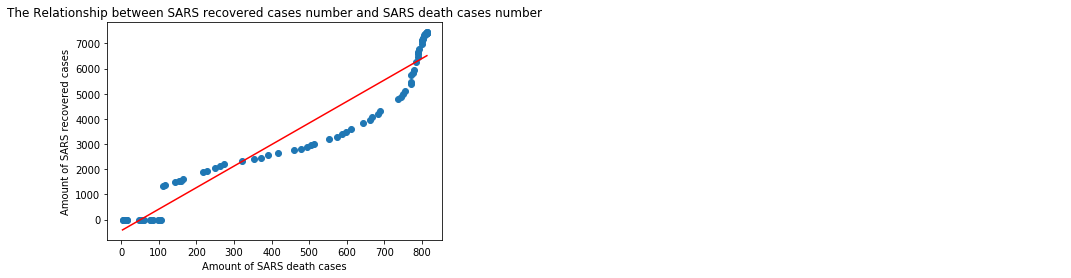

In [39]:
#Plot a linear regression for number recovered vs number deaths for the  SARS final 2003 data set
from scipy.stats import linregress
y_values = final2003["Number recovered"]
x_values = final2003["Number of deaths"].astype(float)
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,200),fontsize=20,color="red")
plt.ylabel('Amount of SARS recovered cases')
plt.xlabel('Amount of SARS death cases')
plt.title("The Relationship between SARS recovered cases number and SARS death cases number")
plt.show()

In [44]:
# S&P index performance during SARs and comparison to the period before and after the break 
stock = 'Resources/S_P 500 Daily- Jan 2002 -Dec 2004.csv'
stock = pd.read_csv(stock)
stock.head()
# .info() to check information of the dataset 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-03-01,1106.729980,1131.790039,1106.729980,1131.780029,1131.780029,1456500000
1,2002-03-04,1131.780029,1153.839966,1130.930054,1153.839966,1153.839966,1594300000
2,2002-03-05,1153.839966,1157.739990,1144.780029,1146.140015,1146.140015,1549300000
3,2002-03-06,1146.140015,1165.290039,1145.109985,1162.770020,1162.770020,1541300000
4,2002-03-07,1162.770020,1167.939941,1150.689941,1157.540039,1157.540039,1517400000


In [45]:
# Converting data type of 'Date' from object to datetime
stock['Date'] = pd.to_datetime(stock['Date'],format = '%Y-%m-%d')
# Set Date as Index for further analysis 
stock.set_index('Date', inplace = True)
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-03-01,1106.729980,1131.790039,1106.729980,1131.780029,1131.780029,1456500000
2002-03-04,1131.780029,1153.839966,1130.930054,1153.839966,1153.839966,1594300000
2002-03-05,1153.839966,1157.739990,1144.780029,1146.140015,1146.140015,1549300000
2002-03-06,1146.140015,1165.290039,1145.109985,1162.770020,1162.770020,1541300000
2002-03-07,1162.770020,1167.939941,1150.689941,1157.540039,1157.540039,1517400000


In [46]:
# Add a column for daily return 
%time stock['Return'] = np.log(stock['Adj Close']/stock['Adj Close'].shift(1))
# Clean dataset
stock = stock[['Open','Adj Close','Return']]
stock.head()

CPU times: user 3.47 ms, sys: 1.11 ms, total: 4.58 ms
Wall time: 3.57 ms


,Open,Adj Close,Return
Date,,,
2002-03-01,1106.729980,1131.780029,NaN
2002-03-04,1131.780029,1153.839966,0.019304
2002-03-05,1153.839966,1146.140015,-0.006696
2002-03-06,1146.140015,1162.770020,0.014405
2002-03-07,1162.770020,1157.540039,-0.004508


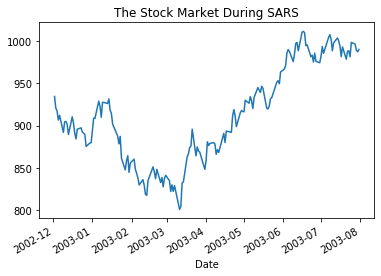

In [47]:
# S&P 500 performance during SARS
sars_stock = stock['2002-12': '2003-7']
sars_stock['Adj Close'].plot(title='The Stock Market During SARS')

In [49]:
stock_druing_sars = sars_stock['Adj Close'].describe()
stock_3_year_trend = stock['Adj Close'].describe()
compare = pd.DataFrame({'2002-2004 Stock Perf':stock_3_year_trend,'During SARs':stock_druing_sars})
compare

,2002-2004 Stock Perf,During SARs
count,715.000000,167.000000
mean,1024.564449,912.087904
std,109.706426,57.272345
min,776.760010,800.729980
25%,919.674988,867.375000
50%,1046.760010,909.929993
75%,1121.849976,969.279999
max,1213.550049,1011.659973


In [50]:
# Calculating montly return from Jan 2002 to Dec 2004
monthly_return = stock.asfreq('M').ffill()
monthly_return.head()

,Open,Adj Close,Return
Date,,,
2002-03-31,NaN,NaN,NaN
2002-04-30,1065.449951,1076.920044,0.010708
2002-05-31,1064.660034,1067.140015,0.002327
2002-06-30,1064.660034,1067.140015,0.002327
2002-07-31,902.780029,911.619995,0.009744


In [51]:
# Compare the stock performance in March, in the years of 2002, 2003 and 2004 
# Open, Close price 
openP = monthly_return['Open']
mar2002_open = openP['2002-03-31']
mar2003_open = openP['2003-03-31']
mar2004_open = openP['2004-03-31']
closeP = monthly_return['Adj Close']
mar2002_close = closeP['2002-03-31']
mar2003_close = closeP['2003-03-31']
mar2004_close = closeP['2004-03-31']

# Comparing 
d = {'Comparison':['March 2002','March 2003','March 2004'],'Open Price': [mar2002_open,mar2003_open,mar2004_open], 'Close Price': [mar2002_close,mar2003_close,mar2004_close]}
df = pd.DataFrame(data=d)
df['Percentage Change _ Open Price'] = df['Open Price']/df['Open Price'].shift(1)-1
df['Percentage Change _ Close Price'] = df['Close Price']/df['Close Price'].shift(1)-1
df.head()

,Comparison,Open Price,Close Price,Percentage Change _ Open Price,Percentage Change _ Close Price
0,March 2002,NaN,NaN,NaN,NaN
1,March 2003,863.5,848.179993,NaN,NaN
2,March 2004,1127.0,1126.209961,0.305153,0.327796


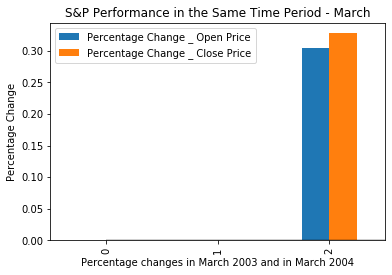

In [52]:
df[['Percentage Change _ Open Price','Percentage Change _ Close Price']].plot(kind = 'bar')
plt.hlines(0, 0, 10, alpha=0.25)
plt.legend(loc="best")
plt.title('S&P Performance in the Same Time Period - March')
plt.xlabel("Percentage changes in March 2003 and in March 2004")
plt.ylabel("Percentage Change")

# Print our chart to the screen
plt.show()

In [53]:
#formatting 
df['Percentage Change _ Open Price'] = df['Percentage Change _ Open Price'].map('{:,.2%}'.format)
df['Percentage Change _ Close Price'] = df['Percentage Change _ Close Price'].map('{:,.2%}'.format)
df

,Comparison,Open Price,Close Price,Percentage Change _ Open Price,Percentage Change _ Close Price
0,March 2002,NaN,NaN,nan%,nan%
1,March 2003,863.5,848.179993,nan%,nan%
2,March 2004,1127.0,1126.209961,30.52%,32.78%


In [54]:
# Calculate monthly percentage change from Jan 2002 to Dec 2004
monthly_change = monthly_return/monthly_return.shift(1)-1
monthly_change.head()

,Open,Adj Close,Return
Date,,,
2002-03-31,NaN,NaN,NaN
2002-04-30,NaN,NaN,NaN
2002-05-31,-0.000741,-0.009081,-0.782717
2002-06-30,0.000000,0.000000,0.000000
2002-07-31,-0.152049,-0.145735,3.188118


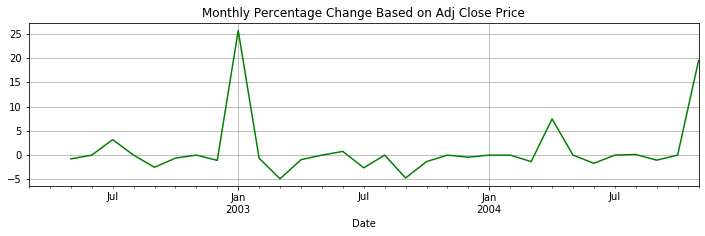

In [55]:
monthly_change['Return'].plot(title = 'Monthly Percentage Change Based on Adj Close Price', color = 'green', figsize=(12,3), grid = True)

In [57]:
start_date = '2002-01-01'
end_date = '2004-07-31'
interval = 'm'
sp500=pdr.get_data_yahoo('^GSPC', start = start_date, end = end_date ,interval =interval)
sp500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-01-01,1176.969971,1081.660034,1148.079956,1130.199951,2.974620e+10,1130.199951
2002-02-01,1130.199951,1074.359985,1130.199951,1106.729980,2.604760e+10,1106.729980
2002-03-01,1173.939941,1106.729980,1106.729980,1147.390015,2.656320e+10,1147.390015
2002-04-01,1147.839966,1063.459961,1147.390015,1076.920044,2.856890e+10,1076.920044
2002-05-01,1106.589966,1048.959961,1076.920044,1067.140015,2.690550e+10,1067.140015


In [58]:
# Add a culumn to calculate percentage daily change
%time sp500['Return'] = np.log(sp500['Adj Close']/sp500['Adj Close'].shift(1))
sp500.head(2)

CPU times: user 1.65 ms, sys: 84 µs, total: 1.73 ms
Wall time: 1.67 ms


,High,Low,Open,Close,Volume,Adj Close,Return
Date,,,,,,,
2002-01-01,1176.969971,1081.660034,1148.079956,1130.199951,2.974620e+10,1130.199951,NaN
2002-02-01,1130.199951,1074.359985,1130.199951,1106.729980,2.604760e+10,1106.729980,-0.020985


In [59]:
TSX=pdr.get_data_yahoo('^GSPTSE', start = start_date, end = end_date ,interval =interval)
%time TSX['Return'] = np.log(TSX['Adj Close']/TSX['Adj Close'].shift(1))
TSX.head(2)

CPU times: user 1.34 ms, sys: 0 ns, total: 1.34 ms
Wall time: 1.35 ms


,High,Low,Open,Close,Volume,Adj Close,Return
Date,,,,,,,
2002-01-01,7875.700195,7468.899902,7679.600098,7648.5,2.086937e+09,7648.5,NaN
2002-02-01,7707.399902,7402.700195,7641.100098,7637.5,2.091999e+09,7637.5,-0.001439


In [60]:
hengseng=pdr.get_data_yahoo('^HSI', start = start_date, end = end_date ,interval =interval)
%time hengseng['Return'] = np.log(hengseng['Adj Close']/hengseng['Adj Close'].shift(1))
hengseng.head(2)

CPU times: user 1.42 ms, sys: 27 µs, total: 1.45 ms
Wall time: 1.45 ms


,High,Low,Open,Close,Volume,Adj Close,Return
Date,,,,,,,
2001-12-31,11905.549805,10671.769531,11368.129883,10725.299805,6.174727e+09,10725.299805,NaN
2002-01-31,11108.480469,10393.830078,10764.030273,10482.549805,3.957172e+09,10482.549805,-0.022893


In [61]:
shenzhenindex = pdr.get_data_yahoo('399001.SZ', start = start_date, end = end_date ,interval =interval)
%time shenzhenindex['Return'] = np.log(shenzhenindex['Adj Close']/shenzhenindex['Adj Close'].shift(1))

CPU times: user 1.39 ms, sys: 10 µs, total: 1.4 ms
Wall time: 1.4 ms


In [62]:
eurostoxx50 = pdr.get_data_yahoo('FEZ', start = start_date, end = end_date ,interval =interval)
%time eurostoxx50['Return'] = np.log(eurostoxx50['Adj Close']/eurostoxx50['Adj Close'].shift(1))

CPU times: user 1.39 ms, sys: 1 µs, total: 1.39 ms
Wall time: 1.4 ms


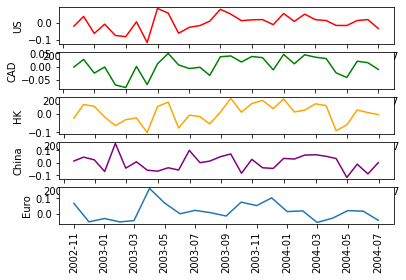

In [63]:
plt.subplot(5,1,1)
plt.plot(sp500['Return'], color = 'red')
plt.ylabel('US')

plt.subplot(5,1,2)
plt.plot(TSX['Return'],color = 'green' )
plt.ylabel('CAD')

plt.subplot(5,1,3)
plt.plot(hengseng['Return'], color ='orange' )
plt.ylabel('HK')

plt.subplot(5,1,4)
plt.plot(shenzhenindex['Return'], color = 'purple')
plt.ylabel('China')

plt.subplot(5,1,5)
plt.plot(eurostoxx50['Return'])
plt.ylabel('Euro')

plt.xticks(rotation = 90)
plt.savefig('more indexes.png')

In [64]:
#2003 Stock Analysis 
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import matplotlib.dates as mdates
import datetime
from collections import defaultdict

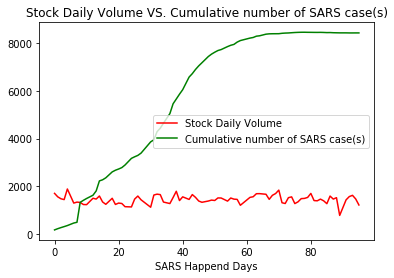

In [65]:
Volume_in_million=final2003["Volume"].div(1000000)
final2003["Volume in million"]=Volume_in_million
plt.plot(final2003["Volume in million"], color="red", label="Stock Daily Volume")
plt.plot(final2003["Cumulative number of case(s)"], color="green", label="Cumulative number of SARS case(s)")
plt.xlabel("SARS Happend Days")
plt.legend(loc="best")
plt.title("Stock Daily Volume VS. Cumulative number of SARS case(s)")
plt.show()

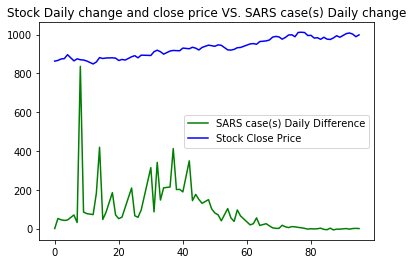

In [66]:
#plt.plot(final2003["Daily Adj close change"].astype(float), color="red", label="Stock Daily change")
plt.plot(final2003["daily_difference"].astype(float), color="green", label="SARS case(s) Daily Difference")
plt.plot(final2003["Adj Close"], color="blue", label="Stock Close Price")
plt.legend(loc="best")
plt.title("Stock Daily change and close price VS. SARS case(s) Daily change")

plt.show()

In [67]:
#2003 Stock  vs 2020 Stock analysis; extra and manipulate 2003 and 2020 stock info
stock2020=pd.read_csv("Resources/S_P 2019 Nov-2020 Mar 13.csv")
stock2020.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-01,3050.719971,3066.949951,3050.719971,3066.909912,3066.909912,3930200000
1,2019-11-04,3078.959961,3085.199951,3074.870117,3078.270020,3078.270020,4146850000
2,2019-11-05,3080.800049,3083.949951,3072.149902,3074.620117,3074.620117,4486130000
3,2019-11-06,3075.100098,3078.340088,3065.889893,3076.780029,3076.780029,4458190000
4,2019-11-07,3087.020020,3097.770020,3080.229980,3085.179932,3085.179932,4144640000


In [68]:
stock2020["Daily Adj close change 2020"]=stock2020["Adj Close"].diff()
stock2020["Daily Volume change 2020"]=stock2020["Volume"].diff()
stock2020.round(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Adj close change 2020,Daily Volume change 2020
0,2019-11-01,3050.72,3066.95,3050.72,3066.91,3066.91,3930200000,NaN,NaN
1,2019-11-04,3078.96,3085.20,3074.87,3078.27,3078.27,4146850000,11.36,2.166500e+08
2,2019-11-05,3080.80,3083.95,3072.15,3074.62,3074.62,4486130000,-3.65,3.392800e+08
3,2019-11-06,3075.10,3078.34,3065.89,3076.78,3076.78,4458190000,2.16,-2.794000e+07
4,2019-11-07,3087.02,3097.77,3080.23,3085.18,3085.18,4144640000,8.40,-3.135500e+08
...,...,...,...,...,...,...,...,...,...
85,2020-03-06,2954.20,2985.93,2901.54,2972.37,2972.37,6552140000,-51.57,9.765900e+08
86,2020-03-09,2863.89,2863.89,2734.43,2746.56,2746.56,8423050000,-225.81,1.870910e+09
87,2020-03-10,2813.48,2882.59,2734.00,2882.23,2882.23,7635960000,135.67,-7.870900e+08
88,2020-03-11,2825.60,2825.60,2707.22,2741.38,2741.38,7374110000,-140.85,-2.618500e+08


In [69]:
stock2020.fillna("0", inplace = True) 
stock2020.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Adj close change 2020,Daily Volume change 2020
0,2019-11-01,3050.719971,3066.949951,3050.719971,3066.909912,3066.909912,3930200000,0,0
1,2019-11-04,3078.959961,3085.199951,3074.870117,3078.270020,3078.270020,4146850000,11.3601,2.1665e+08
2,2019-11-05,3080.800049,3083.949951,3072.149902,3074.620117,3074.620117,4486130000,-3.6499,3.3928e+08
3,2019-11-06,3075.100098,3078.340088,3065.889893,3076.780029,3076.780029,4458190000,2.15991,-2.794e+07
4,2019-11-07,3087.020020,3097.770020,3080.229980,3085.179932,3085.179932,4144640000,8.3999,-3.1355e+08


In [70]:
stock2020['Date']= pd.to_datetime(stock2020['Date'],format='%Y-%m-%d')
stock2020['Year'] = stock2020['Date'].dt.year
stock2020['Month'] = stock2020['Date'].dt.month
stock2020['Day'] = stock2020['Date'].dt.day
stock2020['period']=  stock2020['Month'].astype(str).str.cat(stock2020['Day'].astype(str), sep=' - ')
stock2020.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Adj close change 2020,Daily Volume change 2020,Year,Month,Day,period
0,2019-11-01,3050.719971,3066.949951,3050.719971,3066.909912,3066.909912,3930200000,0,0,2019,11,1,11 - 1
1,2019-11-04,3078.959961,3085.199951,3074.870117,3078.270020,3078.270020,4146850000,11.3601,2.1665e+08,2019,11,4,11 - 4
2,2019-11-05,3080.800049,3083.949951,3072.149902,3074.620117,3074.620117,4486130000,-3.6499,3.3928e+08,2019,11,5,11 - 5
3,2019-11-06,3075.100098,3078.340088,3065.889893,3076.780029,3076.780029,4458190000,2.15991,-2.794e+07,2019,11,6,11 - 6
4,2019-11-07,3087.020020,3097.770020,3080.229980,3085.179932,3085.179932,4144640000,8.3999,-3.1355e+08,2019,11,7,11 - 7


In [71]:
stock2003['Date']= pd.to_datetime(stock2003['Date'],format='%Y-%m-%d')
stock2003['Year'] = stock2003['Date'].dt.year
stock2003['Month'] = stock2003['Date'].dt.month
stock2003['Day'] = stock2003['Date'].dt.day
stock2003['period']=  stock2003['Month'].astype(str).str.cat(stock2003['Day'].astype(str), sep=' - ')
stock2003["Daily Adj close change 2003"]=stock2003["Adj Close"].diff()
stock2003["Daily Volume change 2003"]=stock2003["Volume"].diff()
stock2003.round(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,period,Daily Adj close change 2003,Daily Volume change 2003
0,2002-11-01,885.76,903.42,877.71,900.96,900.96,1450400000,2002,11,1,11 - 1,NaN,NaN
1,2002-11-04,900.96,924.58,900.96,908.35,908.35,1645900000,2002,11,4,11 - 4,7.39,195500000.0
2,2002-11-05,908.35,915.83,904.91,915.39,915.39,1354100000,2002,11,5,11 - 5,7.04,-291800000.0
3,2002-11-06,915.39,925.66,905.00,923.76,923.76,1674000000,2002,11,6,11 - 6,8.37,319900000.0
4,2002-11-07,923.76,923.76,898.68,902.65,902.65,1466900000,2002,11,7,11 - 7,-21.11,-207100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2003-10-24,1033.77,1033.77,1018.32,1028.91,1028.91,1420300000,2003,10,24,10 - 24,-4.86,-184000000.0
247,2003-10-27,1028.91,1037.75,1028.91,1031.13,1031.13,1371800000,2003,10,27,10 - 27,2.22,-48500000.0
248,2003-10-28,1031.13,1046.79,1031.13,1046.79,1046.79,1629200000,2003,10,28,10 - 28,15.66,257400000.0
249,2003-10-29,1046.79,1049.83,1043.35,1048.11,1048.11,1562600000,2003,10,29,10 - 29,1.32,-66600000.0


In [72]:
# merge 2003 and 2020 stock info
final2003_2020=pd.merge(stock2020,stock2003, on="period",how="left" )
final2003_2020

,Date_x,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Daily Adj close change 2020,Daily Volume change 2020,Year_x,...,High_y,Low_y,Close_y,Adj Close_y,Volume_y,Year_y,Month_y,Day_y,Daily Adj close change 2003,Daily Volume change 2003
0,2019-11-01,3050.719971,3066.949951,3050.719971,3066.909912,3066.909912,3930200000,0,0,2019,...,903.419983,877.710022,900.960022,900.960022,1.450400e+09,2002.0,11.0,1.0,NaN,NaN
1,2019-11-04,3078.959961,3085.199951,3074.870117,3078.270020,3078.270020,4146850000,11.3601,2.1665e+08,2019,...,924.580017,900.960022,908.349976,908.349976,1.645900e+09,2002.0,11.0,4.0,7.389954,195500000.0
2,2019-11-05,3080.800049,3083.949951,3072.149902,3074.620117,3074.620117,4486130000,-3.6499,3.3928e+08,2019,...,915.830017,904.909973,915.390015,915.390015,1.354100e+09,2002.0,11.0,5.0,7.040039,-291800000.0
3,2019-11-06,3075.100098,3078.340088,3065.889893,3076.780029,3076.780029,4458190000,2.15991,-2.794e+07,2019,...,925.659973,905.000000,923.760010,923.760010,1.674000e+09,2002.0,11.0,6.0,8.369995,319900000.0
4,2019-11-07,3087.020020,3097.770020,3080.229980,3085.179932,3085.179932,4144640000,8.3999,-3.1355e+08,2019,...,923.760010,898.679993,902.650024,902.650024,1.466900e+09,2002.0,11.0,7.0,-21.109986,-207100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2020-03-06,2954.199951,2985.929932,2901.540039,2972.370117,2972.370117,6552140000,-51.5698,9.7659e+08,2020,...,829.849976,819.849976,822.099976,822.099976,1.299200e+09,2003.0,3.0,6.0,-7.750000,-33500000.0
86,2020-03-09,2863.889893,2863.889893,2734.429932,2746.560059,2746.560059,8423050000,-225.81,1.87091e+09,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-03-10,2813.479980,2882.590088,2734.000000,2882.229980,2882.229980,7635960000,135.67,-7.8709e+08,2020,...,828.890015,806.570007,807.479980,807.479980,1.255000e+09,2003.0,3.0,10.0,-21.410035,-113500000.0
88,2020-03-11,2825.600098,2825.600098,2707.219971,2741.379883,2741.379883,7374110000,-140.85,-2.6185e+08,2020,...,814.250000,800.299988,800.729980,800.729980,1.427700e+09,2003.0,3.0,11.0,-6.750000,172700000.0


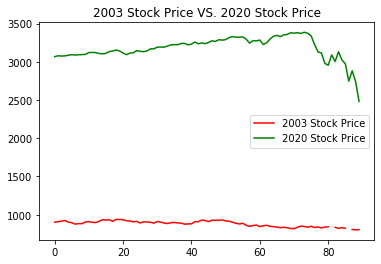

In [73]:
# 2003 Stock Price VS. 2020 Stock Price trending
plt.plot(final2003_2020["Adj Close_y"], color="red", label="2003 Stock Price")
plt.plot(final2003_2020["Adj Close_x"].astype(float), color="green", label="2020 Stock Price")
plt.legend(loc="best")
plt.title("2003 Stock Price VS. 2020 Stock Price")
plt.show()

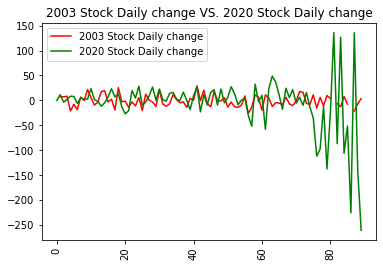

In [74]:
# 2003 Stock Daily change VS. 2020 Stock Daily change
plt.plot(final2003_2020["Daily Adj close change 2003"].astype(float), color="red", label="2003 Stock Daily change")
plt.plot(final2003_2020["Daily Adj close change 2020"].astype(float), color="green", label="2020 Stock Daily change")
plt.legend(loc="best")
plt.title("2003 Stock Daily change VS. 2020 Stock Daily change")
plt.xticks(rotation=90) 
plt.show()

In [75]:
covid_19=pd.read_csv("Resources/COVID-19 data.csv")
covid_19.head()

,Date,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
0,2019-12-31,Afghanistan,0,0.0,AF,NaN,Non-EU/EEA
1,2019-12-31,Algeria,0,0.0,DZ,NaN,Non-EU/EEA
2,2019-12-31,Armenia,0,0.0,AM,NaN,Non-EU/EEA
3,2019-12-31,Australia,0,0.0,AU,NaN,Non-EU/EEA
4,2019-12-31,Austria,0,0.0,AT,NaN,EU


In [76]:
covid_19_data = covid_19[["Date", "NewConfCases", "NewDeaths"]]
covid_19_data.head()

,Date,NewConfCases,NewDeaths
0,2019-12-31,0,0.0
1,2019-12-31,0,0.0
2,2019-12-31,0,0.0
3,2019-12-31,0,0.0
4,2019-12-31,0,0.0


In [77]:
covid_19_grouped= covid_19_data.groupby("Date").sum().reset_index()
covid_19_grouped

,Date,NewConfCases,NewDeaths
0,2019-12-31,27,0.0
1,2020-01-01,0,0.0
2,2020-01-02,0,0.0
3,2020-01-03,17,0.0
4,2020-01-04,0,0.0
...,...,...,...
72,2020-03-12,6887,326.0
73,2020-03-13,8352,351.0
74,2020-03-14,9375,438.0
75,2020-03-15,8140,354.0


In [78]:
stock2020new=stock2020.iloc[40:89,:]
stock2020new.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Adj close change 2020,Daily Volume change 2020,Year,Month,Day,period
40,2019-12-31,3215.179932,3231.719971,3212.030029,3230.780029,3230.780029,2893810000,9.48999,-1.1948e+08,2019,12,31,12 - 31
41,2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000,27.0701,5.6444e+08,2020,1,2,1 - 2
42,2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000,-23,3.04e+06,2020,1,3,1 - 3
43,2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000,11.4299,2.1278e+08,2020,1,6,1 - 6
44,2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000,-9.1001,-2.5369e+08,2020,1,7,1 - 7


In [79]:
covid_19_grouped['Date']=pd.to_datetime(covid_19_grouped['Date'],format='%Y-%m-%d')
covid_stock=pd.merge(covid_19_grouped,stock2020new, on="Date",how="outer" )
covid_stock

,Date,NewConfCases,NewDeaths,Open,High,Low,Close,Adj Close,Volume,Daily Adj close change 2020,Daily Volume change 2020,Year,Month,Day,period
0,2019-12-31,27,0.0,3215.179932,3231.719971,3212.030029,3230.780029,3230.780029,2.893810e+09,9.48999,-1.1948e+08,2019.0,12.0,31.0,12 - 31
1,2020-01-01,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,0,0.0,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3.458250e+09,27.0701,5.6444e+08,2020.0,1.0,2.0,1 - 2
3,2020-01-03,17,0.0,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3.461290e+09,-23,3.04e+06,2020.0,1.0,3.0,1 - 3
4,2020-01-04,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2020-03-12,6887,326.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,2020-03-13,8352,351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,2020-03-14,9375,438.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,2020-03-15,8140,354.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


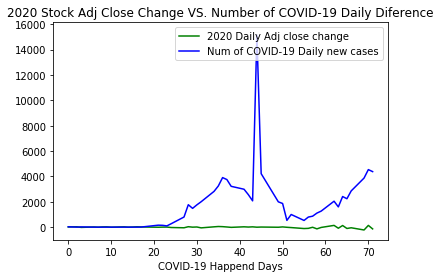

In [81]:
covid_stock.dropna(inplace = True)
covid_stock.fillna("0", inplace = True) 
plt.plot(covid_stock["Daily Adj close change 2020"], color="green", label="2020 Daily Adj close change")
plt.plot(covid_stock["NewConfCases"].astype(int), color="blue", label="Num of COVID-19 Daily new cases")
plt.xlabel("COVID-19 Happend Days")
plt.legend(loc="upper right")
plt.ylim(-1000,max(covid_stock["NewConfCases"])+1000)
plt.title("2020 Stock Adj Close Change VS. Number of COVID-19 Daily Diference")
plt.show()

In [ ]:
#---END---THANK YOU----